<a href="https://colab.research.google.com/github/Ghanifhakbar/GDGOC-PERT2/blob/main/data_2(LTP_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/LTP.csv', encoding='latin-1') # mengapa harus di encoding?
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [1433]:
# Menghapus baris yang mengandung '16GB', '32GB', atau '64GB' pada kolom 'Memory'
df = df[~df['Memory'].str.contains('16gb|32gb|64gb|8GB|8gb|16GB|32GB|64GB', case=False, na=False)]

#Menyimpan dataset yang sudah dibersihkan
df.to_csv('/content/Cleaned_LTP.csv', index=False)


In [1434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 2 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1052 non-null   int64  
 1   Company           1052 non-null   object 
 2   Product           1052 non-null   object 
 3   TypeName          1052 non-null   object 
 4   Inches            1052 non-null   float64
 5   ScreenResolution  1052 non-null   object 
 6   Cpu               1052 non-null   object 
 7   Ram               1052 non-null   object 
 8   Memory            1052 non-null   object 
 9   Gpu               1052 non-null   object 
 10  OpSys             1052 non-null   object 
 11  Weight            1052 non-null   object 
 12  Price_euros       1052 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 115.1+ KB


In [1435]:
df['Memory'].value_counts().sort_values()

,count
Memory,
256GB SSD + 1.0TB Hybrid,1
1.0TB HDD,1
240GB SSD,1
512GB SSD + 512GB SSD,1
1TB HDD + 1TB HDD,1
512GB SSD + 256GB SSD,1
512GB SSD + 1.0TB Hybrid,1
256GB SSD + 256GB SSD,2
256GB SSD + 500GB HDD,2


#Remove unnecessary columns

In [1436]:
cols_to_remove = ['laptop_ID', 'Company','Product','Price_euros','OpSys']
df.drop(cols_to_remove, axis=1, inplace=True)

df.head(10)

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,1.86kg
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg
5,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,2.1kg
6,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,2.04kg
7,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,1.34kg
8,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,1.3kg
9,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,1.6kg
10,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,1.86kg
11,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,1.86kg


#Put columns into consistent format

In [1437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 2 to 1302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TypeName          1052 non-null   object 
 1   Inches            1052 non-null   float64
 2   ScreenResolution  1052 non-null   object 
 3   Cpu               1052 non-null   object 
 4   Ram               1052 non-null   object 
 5   Memory            1052 non-null   object 
 6   Gpu               1052 non-null   object 
 7   Weight            1052 non-null   object 
dtypes: float64(1), object(7)
memory usage: 74.0+ KB


In [1438]:
# Remove 'kg' and convert to numeric
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)

# Check if conversion is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 2 to 1302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TypeName          1052 non-null   object 
 1   Inches            1052 non-null   float64
 2   ScreenResolution  1052 non-null   object 
 3   Cpu               1052 non-null   object 
 4   Ram               1052 non-null   float64
 5   Memory            1052 non-null   object 
 6   Gpu               1052 non-null   object 
 7   Weight            1052 non-null   float64
dtypes: float64(3), object(5)
memory usage: 74.0+ KB


#Checking missing values

In [1439]:
df.isna().sum()

,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
Weight,0


#Checking duplicated values

In [1440]:
df.duplicated().sum()

98

#Handling Duplicated Values
- removing duplicated rows


In [1441]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#Visualize numerical columns with boxplot

In [1442]:
num_cols = ['Weight', 'Ram', 'Inches']

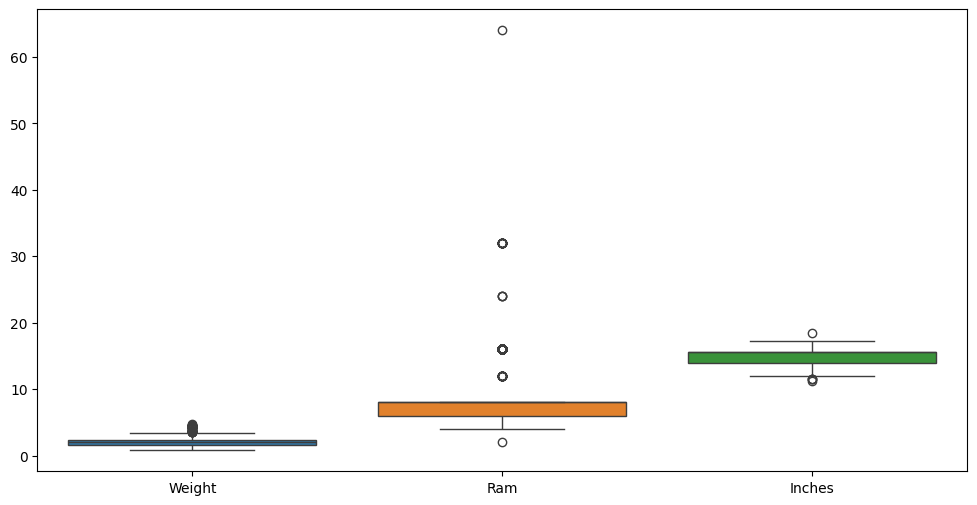

In [1443]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

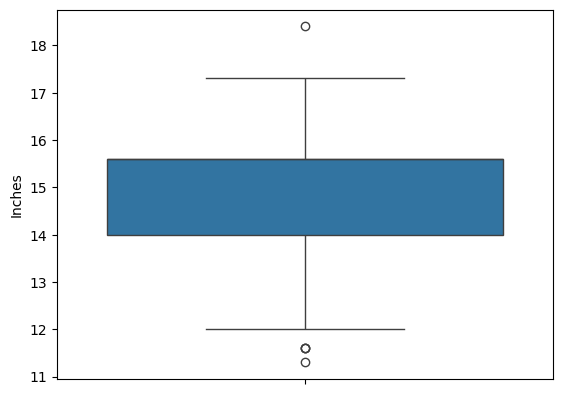

In [1444]:
sns.boxplot(data=df['Inches'])
plt.show()

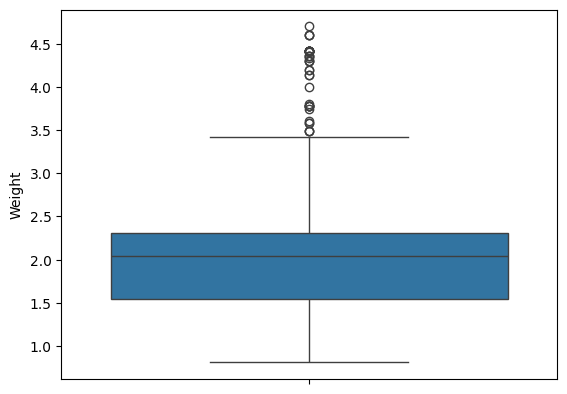

In [1445]:
sns.boxplot(data=df['Weight'])
plt.show()

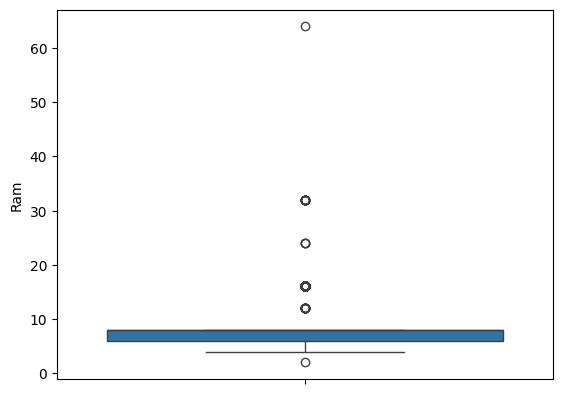

In [1446]:
sns.boxplot(data=df['Ram'])
plt.show()

#Visualize numerical columns with Histogram Plot

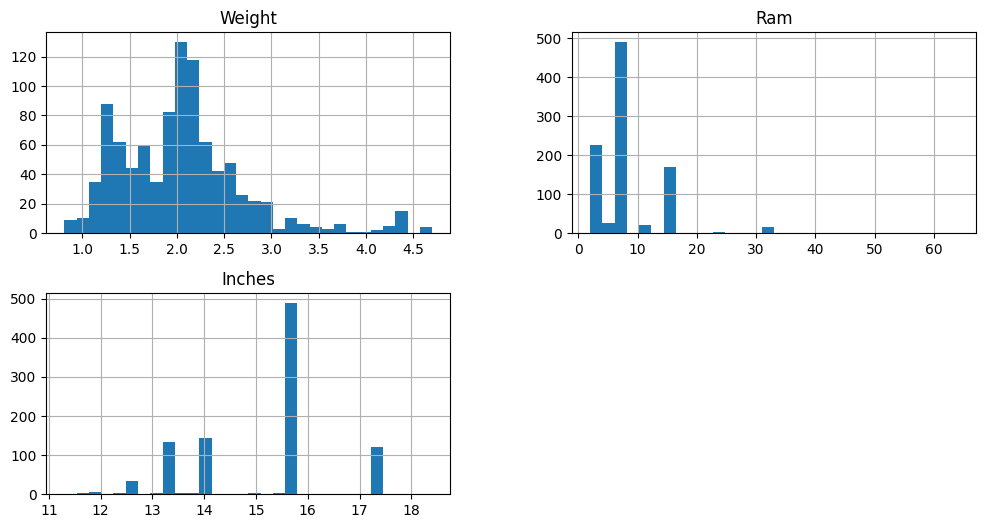

In [1447]:
df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [1448]:
df['Ram'].value_counts()

,count
Ram,
8.0,491
4.0,224
16.0,170
6.0,27
12.0,20
32.0,17
24.0,3
64.0,1
2.0,1


Reducing Outliers by log transform`Ram` column

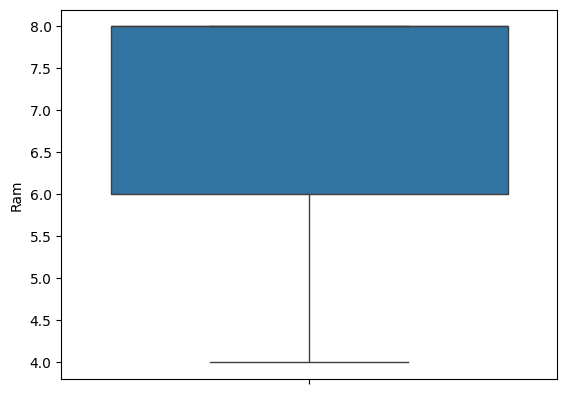

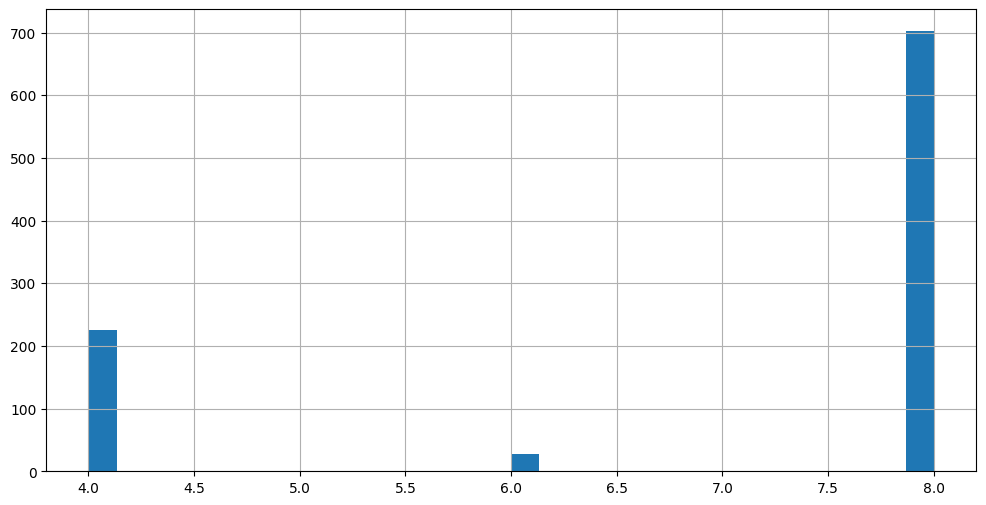

In [1449]:
from scipy.stats.mstats import winsorize

df['Ram'] = winsorize(df['Ram'], limits=[0.23, 0.23]) #menggunakan presentil 5% masih terdapat outliers
# Visualisasi Distribusi Data setelah Winsorization
sns.boxplot(data=df['Ram'])
plt.show()
df['Ram'].hist(bins=30, figsize=(12, 6))
plt.show()

#Split data into train & test to avoid data leakage

In [1450]:
# Split data into training and testing sets
X = df.drop('TypeName', axis=1)
y = df['TypeName']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((763, 7), (191, 7), (763,), (191,))

In [1451]:
X_train

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight
359,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8.0,256GB SSD,Intel HD Graphics 620,1.36
1187,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4.0,256GB SSD,Nvidia GeForce 940MX,2.23
993,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,2.30
135,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256GB SSD,Intel UHD Graphics 620,1.63
101,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4.0,500GB HDD,AMD Radeon R2,2.10
...,...,...,...,...,...,...,...
132,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256GB SSD,Intel UHD Graphics 620,1.60
328,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256GB SSD,Intel HD Graphics 620,1.26
1147,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,256GB SSD,Nvidia GeForce 940MX,2.18
555,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4.0,500GB HDD,Intel HD Graphics 500,2.00


In [1452]:
df.isna().sum()

,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
Weight,0


#Feature Scaling (numerical column only!!)

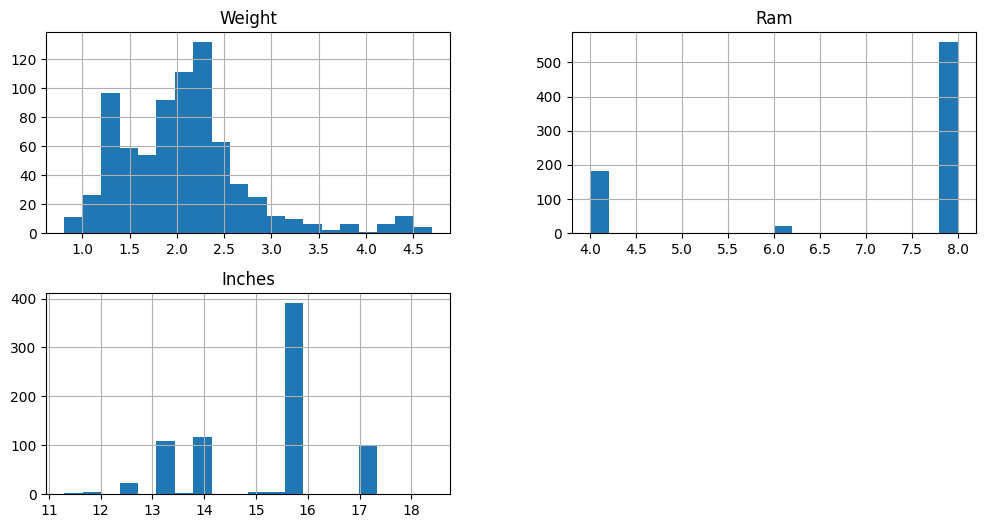

In [1453]:
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

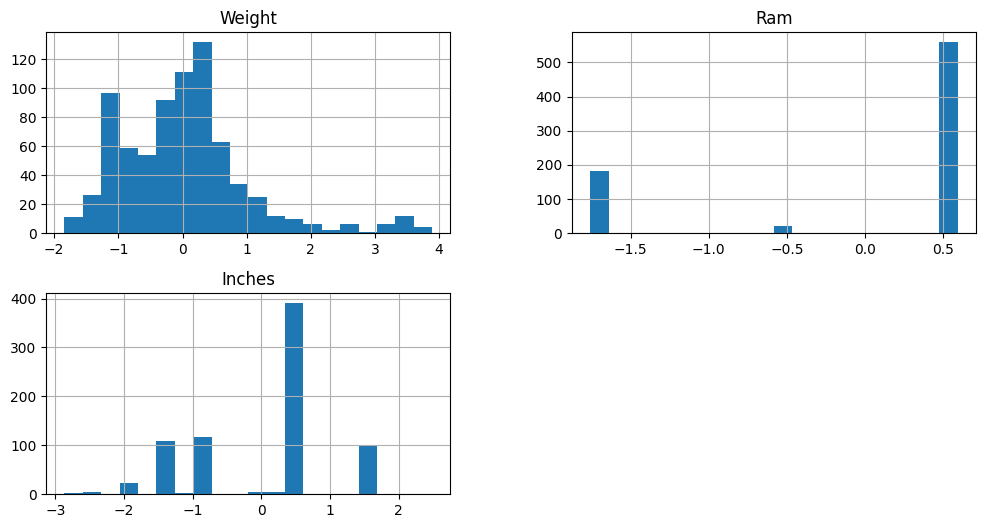

In [1454]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show() #apakah outliers feature scalling harus dihilangkan? demi prediksi yang baik?


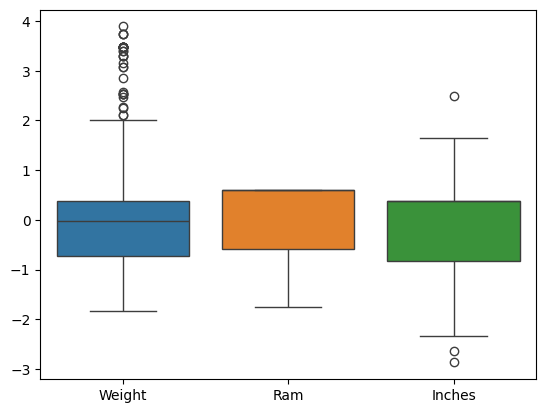

In [1455]:
sns.boxplot(data=X_train[num_cols])
plt.show() # data weight dan inches keberagaman alami

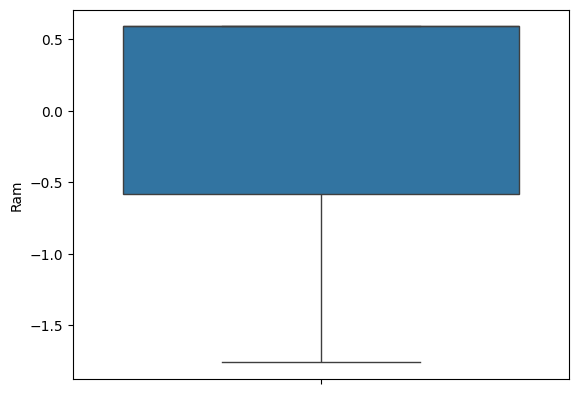

In [1456]:
sns.boxplot(data=X_test['Ram'])
plt.show()

#Handling Missing Values



In [1457]:
X_train.isna().sum() / len(X_train)

,0
Inches,0.0
ScreenResolution,0.0
Cpu,0.0
Ram,0.0
Memory,0.0
Gpu,0.0
Weight,0.0


In [1458]:
X_test.isna().sum() / len(X_test)

,0
Inches,0.0
ScreenResolution,0.0
Cpu,0.0
Ram,0.0
Memory,0.0
Gpu,0.0
Weight,0.0


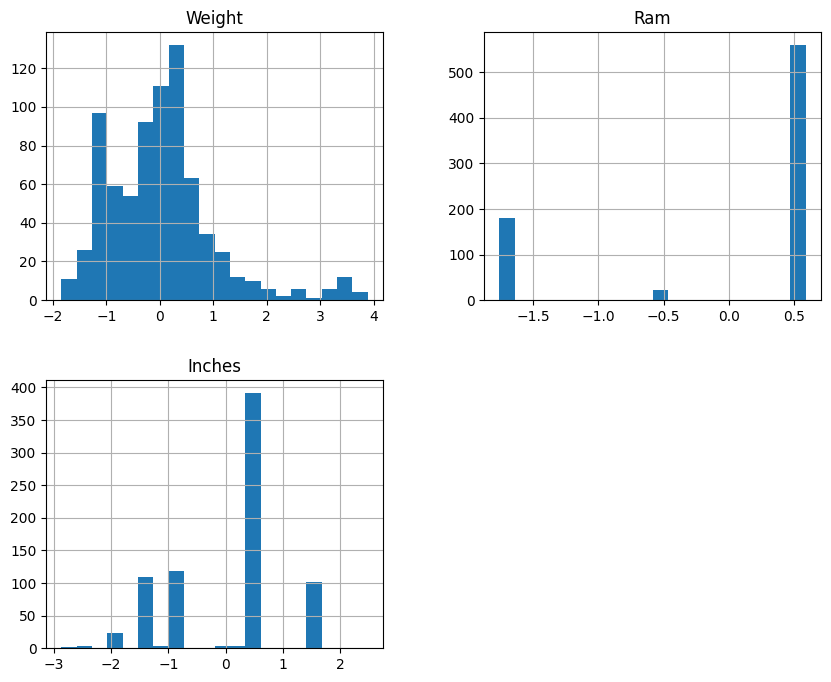

In [1459]:
X_train[num_cols].hist(bins=20, figsize=(10, 8))
plt.show()

In [1460]:
print(X_test.isna().sum())

Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
Weight              0
dtype: int64


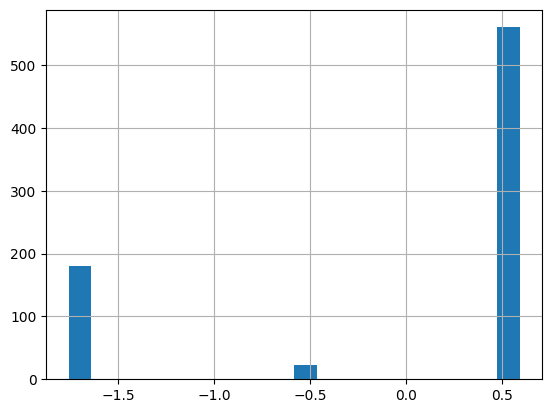

In [1461]:
X_train['Ram'].hist(bins=20)
plt.show()

In [1462]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*70)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*70)

----------------------------------------------------------------------
ScreenResolution
Full HD 1920x1080                                317
1366x768                                         135
IPS Panel Full HD 1920x1080                      132
Full HD / Touchscreen 1920x1080                   35
IPS Panel Full HD / Touchscreen 1920x1080         29
1600x900                                          17
Quad HD+ / Touchscreen 3200x1800                  11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
Touchscreen 1366x768                               9
IPS Panel 4K Ultra HD 3840x2160                    8
4K Ultra HD / Touchscreen 3840x2160                7
4K Ultra HD 3840x2160                              6
IPS Panel Retina Display 2560x1600                 5
IPS Panel Retina Display 2304x1440                 4
Touchscreen 2560x1440                              4
IPS Panel Retina Display 2880x1800                 4
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Q

In [1463]:
# Membersihkan data untuk menghindari perbedaan kecil dalam penulisan
X_train['Memory'] = X_train['Memory'].str.strip().str.upper()

# Hapus data dengan "8GB SSD" setelah memastikan tidak ada perbedaan format
X_train = X_train[X_train['Memory'] != '8GB SSD']

# Cek distribusi data setelah penghapusan
categorical_cols = X_train.select_dtypes(include=['object']).columns
print('-'*70)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*70)


----------------------------------------------------------------------
ScreenResolution
Full HD 1920x1080                                317
1366x768                                         135
IPS Panel Full HD 1920x1080                      132
Full HD / Touchscreen 1920x1080                   35
IPS Panel Full HD / Touchscreen 1920x1080         29
1600x900                                          17
Quad HD+ / Touchscreen 3200x1800                  11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
Touchscreen 1366x768                               9
IPS Panel 4K Ultra HD 3840x2160                    8
4K Ultra HD / Touchscreen 3840x2160                7
4K Ultra HD 3840x2160                              6
IPS Panel Retina Display 2560x1600                 5
IPS Panel Retina Display 2304x1440                 4
Touchscreen 2560x1440                              4
IPS Panel Retina Display 2880x1800                 4
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Q

#Categorical Encoding

In [1464]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Kolom-kolom kategorikal yang akan di-encode
categorical_cols = ['Gpu', 'Memory', 'Cpu', 'ScreenResolution']

# Melakukan label encoding untuk setiap kolom
for col in categorical_cols:
    # Combine unique values from both train and test sets
    all_values = pd.concat([X_train[col], X_test[col]]).unique()

    # Fit the encoder on all unique values
    le.fit(all_values)

    # Transform both train and test sets
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Menampilkan hasil encoding (opsional)
X_train.head()

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight
359,-0.833149,8,59,0.591300,11,49,-1.029586
1187,0.373385,8,56,-1.758501,11,67,0.251611
993,0.373385,8,50,0.591300,11,44,0.354696
135,-0.833149,8,87,0.591300,11,56,-0.631973
101,0.373385,8,18,-1.758501,18,10,0.060168


In [1465]:
X_train.columns

Index(['Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'Weight'], dtype='object')

In [1466]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,517
Ultrabook,177
Gaming,135
2 in 1 Convertible,93
Workstation,27
Netbook,5


#Label Encoding Target Values

In [1467]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train

array([3, 3, 3, 3, 3, 1, 3, 3, 5, 3, 3, 1, 4, 3, 3, 3, 3, 1, 4, 1, 3, 0,
       3, 3, 1, 3, 3, 1, 0, 3, 3, 3, 5, 4, 1, 4, 4, 0, 3, 3, 4, 4, 4, 3,
       4, 3, 4, 0, 3, 3, 3, 1, 4, 3, 1, 3, 1, 4, 1, 4, 0, 3, 3, 3, 4, 4,
       4, 3, 3, 5, 3, 0, 3, 3, 1, 3, 4, 1, 4, 1, 0, 3, 1, 1, 3, 3, 3, 3,
       1, 1, 1, 5, 3, 3, 3, 0, 0, 4, 4, 4, 0, 3, 3, 3, 0, 3, 3, 3, 1, 3,
       3, 3, 3, 5, 4, 3, 0, 4, 1, 3, 4, 4, 4, 1, 3, 3, 1, 3, 3, 3, 0, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 5, 1, 3, 4, 4, 3, 3, 0, 0, 4, 3, 3, 3,
       3, 0, 4, 4, 3, 4, 1, 0, 3, 0, 3, 1, 3, 4, 3, 3, 3, 3, 1, 3, 3, 4,
       3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 4, 4, 3, 1, 4, 3, 1, 3, 3,
       4, 4, 3, 3, 4, 3, 4, 3, 1, 1, 3, 4, 1, 3, 3, 3, 1, 3, 5, 3, 0, 5,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 4, 3, 3, 0, 3, 3, 3, 5, 4, 3, 1, 3, 3, 3, 0, 4, 3, 3, 0, 4, 3,
       4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 1, 3,
       3, 4, 5, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 2,

In [1468]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
3    423
4    133
1    112
0     72
5     19
2      4
Name: count, dtype: int64

Test Label 
3    94
4    44
1    23
0    21
5     8
2     1
Name: count, dtype: int64


In [1469]:
X_train

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight
359,-0.833149,8,59,0.591300,11,49,-1.029586
1187,0.373385,8,56,-1.758501,11,67,0.251611
993,0.373385,8,50,0.591300,11,44,0.354696
135,-0.833149,8,87,0.591300,11,56,-0.631973
101,0.373385,8,18,-1.758501,18,10,0.060168
...,...,...,...,...,...,...,...
132,-0.833149,15,87,0.591300,11,56,-0.676152
328,-1.964275,8,78,0.591300,11,49,-1.176850
1147,0.373385,8,78,0.591300,11,67,0.177979
555,0.373385,0,27,-1.758501,18,40,-0.087096


In [1470]:
# merge label with feature
X_train['Churn'] = y_train
X_test['Churn'] = y_test

In [1471]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 359 to 126
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            763 non-null    float64
 1   ScreenResolution  763 non-null    int64  
 2   Cpu               763 non-null    int64  
 3   Ram               763 non-null    float64
 4   Memory            763 non-null    int64  
 5   Gpu               763 non-null    int64  
 6   Weight            763 non-null    float64
 7   Churn             763 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 53.6 KB


In [1472]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 235 to 598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            191 non-null    float64
 1   ScreenResolution  191 non-null    int64  
 2   Cpu               191 non-null    int64  
 3   Ram               191 non-null    float64
 4   Memory            191 non-null    int64  
 5   Gpu               191 non-null    int64  
 6   Weight            191 non-null    float64
 7   Churn             191 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 13.4 KB


In [1473]:
X_train.drop_duplicates(inplace=True)

In [1474]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
